# Analizing Some Aggregated Results of a 100 Runs of the EA

# Preliminaries
## Importing packages

In [1]:
import numpy as np

import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
#sns.set_context('notebook')
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

2019-05-12 10:18:14.344216


# Define landscape

In [3]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -1
y_point = -1

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    
    x=(x-5)/6
    y=(y-5)/6
    
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

#Testing the minimum
f(-1,-1)

0.0

# Running the EA
## Setting parameters

In [4]:
#starting seed
np.random.seed(42)

In [5]:
#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 100
gen_f = 50

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'fitness_proportional_selection'
par_s = 60

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'uniform'
### Mutation method, probability and size
mutation = 'random_all_gau_dis'
mut_p = 0.5
mut_s = 2.5

## New population selection method
population_new='tournament_k3'

## Running it a 100 times

In [6]:
%%time
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

Wall time: 2min 50s


# Data analysis
## Top 10 fittest

In [17]:
z = gen_f
query = (fitness_res['generation']==z)
fitness_res[query].sort_values(by=['fitness_min']).head(10)

,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
1172,22,50.0,0.101142,0.493895,0.120780,0.087822
1682,32,50.0,0.120822,0.891730,0.159368,0.172380
1019,19,50.0,0.121044,0.121044,0.121044,0.000000
1121,21,50.0,0.122415,0.976832,0.278564,0.322459
968,18,50.0,0.136085,0.645196,0.161541,0.113841
3416,66,50.0,0.141969,1.174373,0.193589,0.230853
3977,77,50.0,0.147652,0.972014,0.188870,0.184333
2600,50,50.0,0.147705,0.895578,0.272952,0.270788
4640,90,50.0,0.151111,0.151111,0.151111,0.000000
1223,23,50.0,0.154803,0.679797,0.181052,0.117392


## Top 10 least fit

In [18]:
fitness_res[query].sort_values(by=['fitness_min'], ascending=False).head(10)

,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
3110,60,50.0,0.387130,0.937260,0.431797,0.141521
1937,37,50.0,0.369271,1.018120,0.425211,0.174607
4283,83,50.0,0.354585,0.620222,0.367867,0.059398
3773,73,50.0,0.353678,1.051130,0.412066,0.183453
1478,28,50.0,0.350925,0.350925,0.350925,0.000000
662,12,50.0,0.346175,0.346175,0.346175,0.000000
5048,98,50.0,0.340334,0.340334,0.340334,0.000000
2702,52,50.0,0.335841,0.614893,0.397661,0.071038
3875,75,50.0,0.333594,0.959895,0.364909,0.140045
4232,82,50.0,0.318594,0.789792,0.342154,0.105363


# Data visualization
## Agregated results visualization

In [19]:
z = gen_f
query = (fitness_res['generation']==z)
type(fitness_res[query]['fitness_mean'])

pandas.core.series.Series

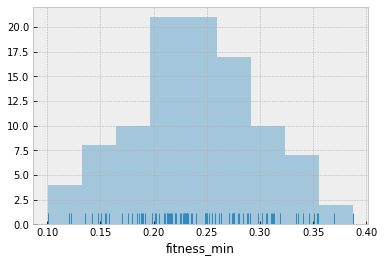

In [20]:
sns.distplot(fitness_res[query]['fitness_min'], rug=True, kde=False)

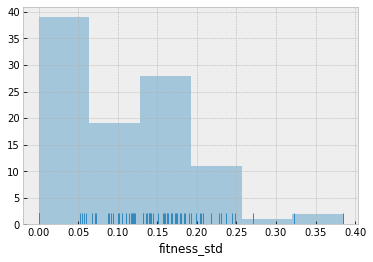

In [21]:
sns.distplot(fitness_res[query]['fitness_std'], rug=True, kde=False)

## Population movement

In [12]:
#Visualization parameters
grph_steps = 61
a=15
b=-60
ratio_w=1.3
ln=.75


Generation 0


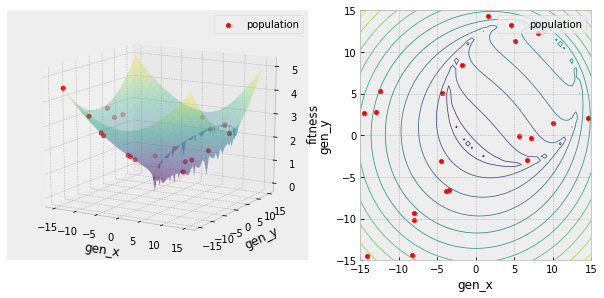

Generation 4


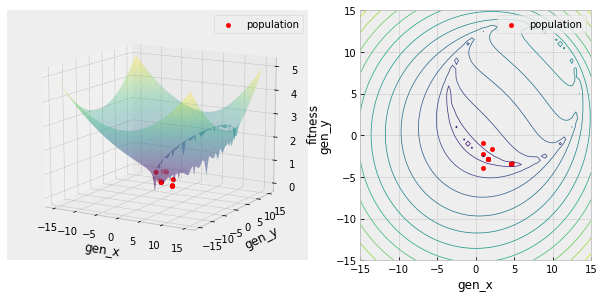

Generation 8


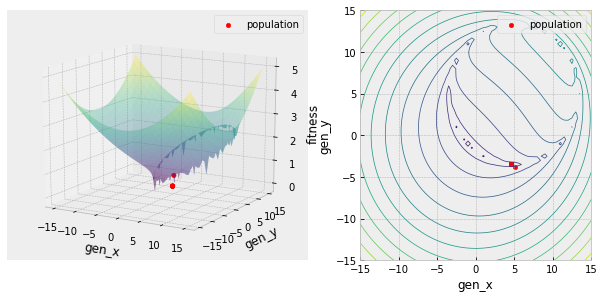

Generation 16


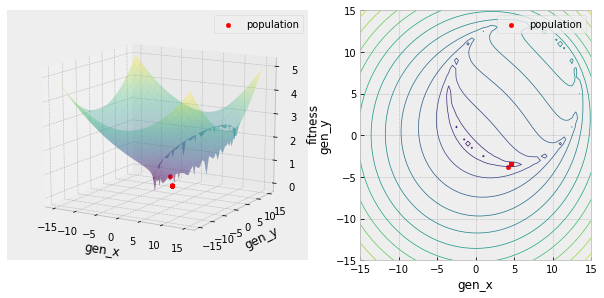

Generation 24


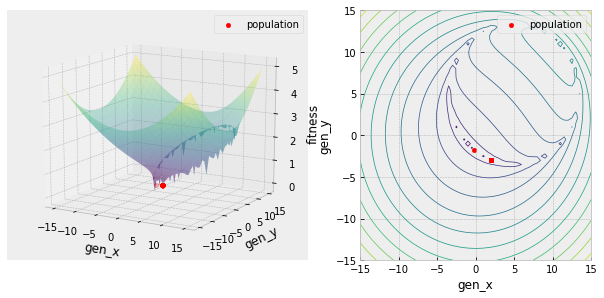

Generation 32


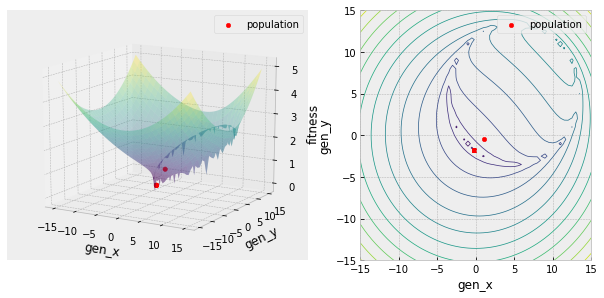

Generation 40


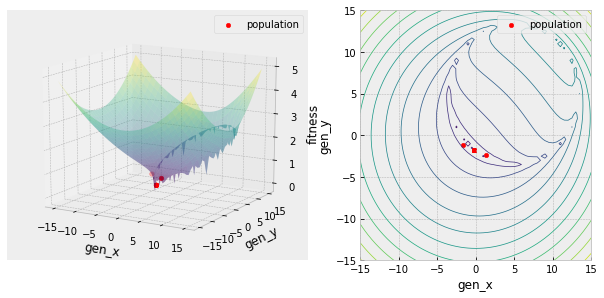

Wall time: 6.45 s


In [22]:
%%time
run_s = 22

print('Generation 0')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 4')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 4, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 8')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 8, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 16')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 16, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 24')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 24, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 32')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 32, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

Generation 0


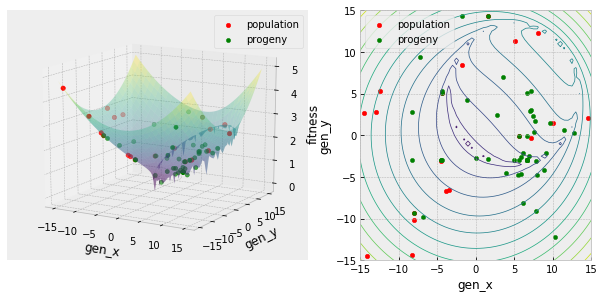

Generation 5


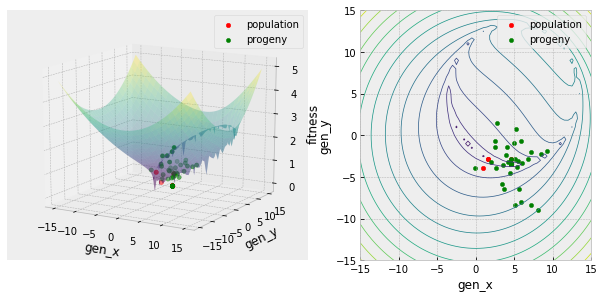

Generation 10


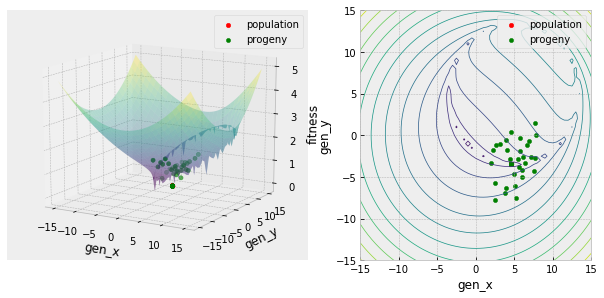

Generation 20


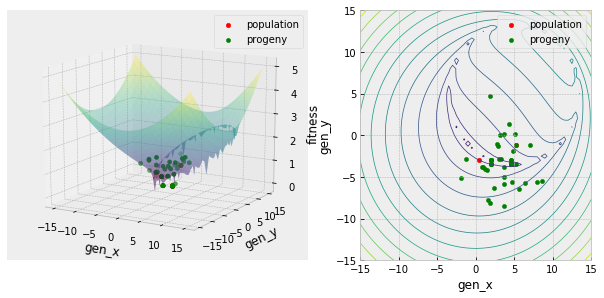

Generation 30


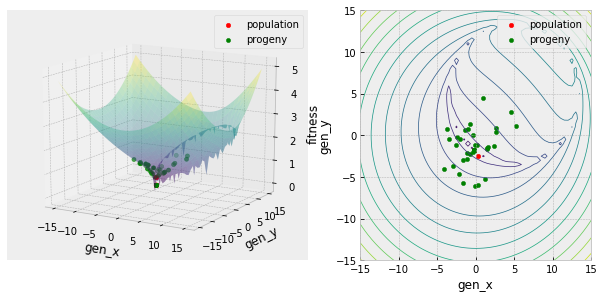

Generation 40


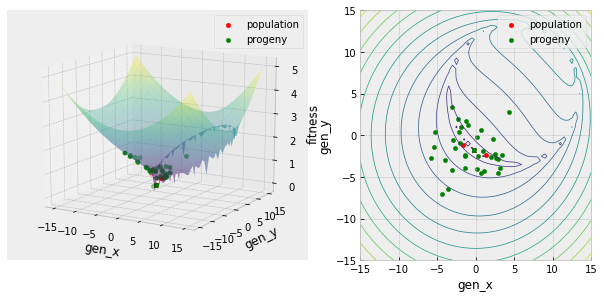

Generation 45


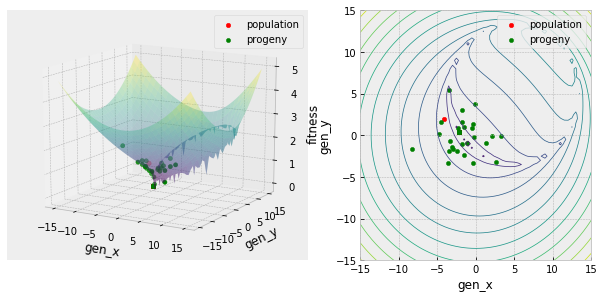

Generation 49


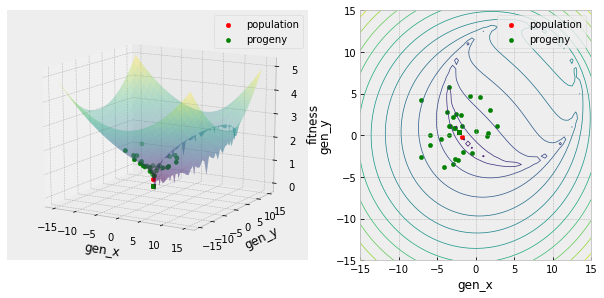

In [24]:
print('Generation 0')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 5')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 5, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 10')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 10, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 20')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 20, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 30')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 30, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 45')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 45, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 49')
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, 49, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

In [23]:
time_b = datetime.datetime.now()
print(time_b)
print(time_b-time_a)

2019-05-12 10:22:39.104551
0:04:24.760335


In [15]:
query = (genera_res['generation']==50) & (genera_res['run']==run_s)
genera_res[query]

,run,generation,birthdate,function,fitness,gen_x,gen_y
116560,28,50.0,2892.0,population,0.350925,2.532896,-3.112139
116561,28,50.0,2938.0,population,0.350925,2.532896,-3.112139
116562,28,50.0,2968.0,population,0.350925,2.532896,-3.112139
116563,28,50.0,2961.0,population,0.350925,2.532896,-3.112139
116564,28,50.0,3016.0,population,0.350925,2.532896,-3.112139
116565,28,50.0,2931.0,population,0.350925,2.532896,-3.112139
116566,28,50.0,2957.0,population,0.350925,2.532896,-3.112139
116567,28,50.0,3009.0,population,0.350925,2.532896,-3.112139
116568,28,50.0,2976.0,population,0.350925,2.532896,-3.112139
116569,28,50.0,2961.0,population,0.350925,2.532896,-3.112139


In [16]:
time_b = datetime.datetime.now()
print(time_b)
print(time_b-time_a)

2019-05-12 10:21:16.755665
0:03:02.411449
